## Project: Titanic - Machine Learning from Disaster

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train_df = pd.read_csv('./data/train.csv',index_col ="PassengerId")
test_df = pd.read_csv('./data/test.csv',index_col ="PassengerId")

In [3]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

### Notes
* SibSp:# of siblings / Spouses aboard the Titanic
* Parch: # of parents / children aboard the Titanic
* Ticket: Ticket number
* Cabin: Cabin number

In [5]:
# Review data
train_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Feature Classification:Categorical vs Numerical
* this helps us select the appropriale plots for visualization.
##### Which features are categorical?
* Categorical Features: nominal,ordinal,ratio,interval
* To classify the samples into sets of simliar samples
##### Which features are numerical?
* Numerical features: `discrete`,`continuos`,or `timeseries`
* These values change from samples to sample

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


* Categorical:`Survived`,`Sex`,`Embarked`,'`Pclass`,`SibSp`,`Parch`
* Numerical:(continuous)`age`,(discrete)`Fare`
* Mix type of data `Ticket`,`Cabin`
* Contain Error/ Typo:`Name`
* Blank or Nuil: `Cabin` > `Age` > `Embarked`
* Various Data Type:String,Int,Float

In [8]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [9]:
train_df['Survived'].dtype


CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [10]:
features = ["Pclass","Sex","SibSp","Parch","Embarked"]
def convert_cat(df,features):
    for feature in features:
        df[feature] = df[feature].astype("category")
convert_cat(train_df,features)
convert_cat(test_df,features)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    category
 5   Parch     418 non-null    category
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    category
dtypes: category(5), float64(2), object(3)
memory usage: 22.7+ KB


## Distribution of Numerical feature values across the samples

In [13]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


## Distribution of Categorical features

In [14]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# 3. Exploratory Data Analysis (EDA)
### Correlating categorical features
* Categorical: `Survived`,`Sex`,`Embarked`,`Pclass`,(ordinal),`SibSp`,`Parch`

### Target Variable:`Survived`
`

In [15]:
train_df["Survived"].value_counts().to_frame()


,count
Survived,
0,549
1,342


In [16]:
train_df["Survived"].value_counts(normalize=True).to_frame()


,proportion
Survived,
0,0.616162
1,0.383838


##### Only 38% survived the disaster. So the traning data suffers from data imbalance but it is not severe which is why i will not consider techiques like sqmpling to tackle the imbalance

### Sex

In [17]:
train_df["Sex"].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


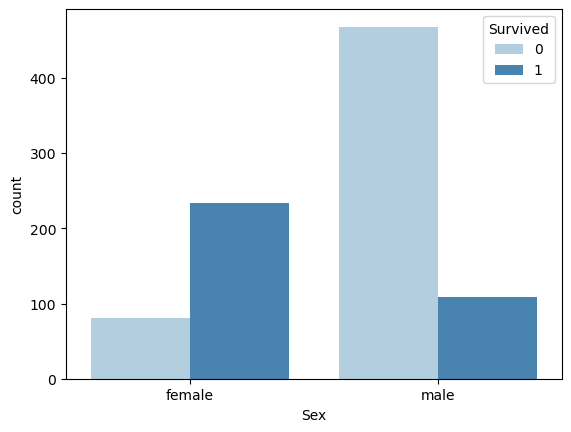

In [18]:
sns.countplot(data = train_df,x="Sex",hue="Survived",palette="Blues");

- Remaining Categorical Feature Columns

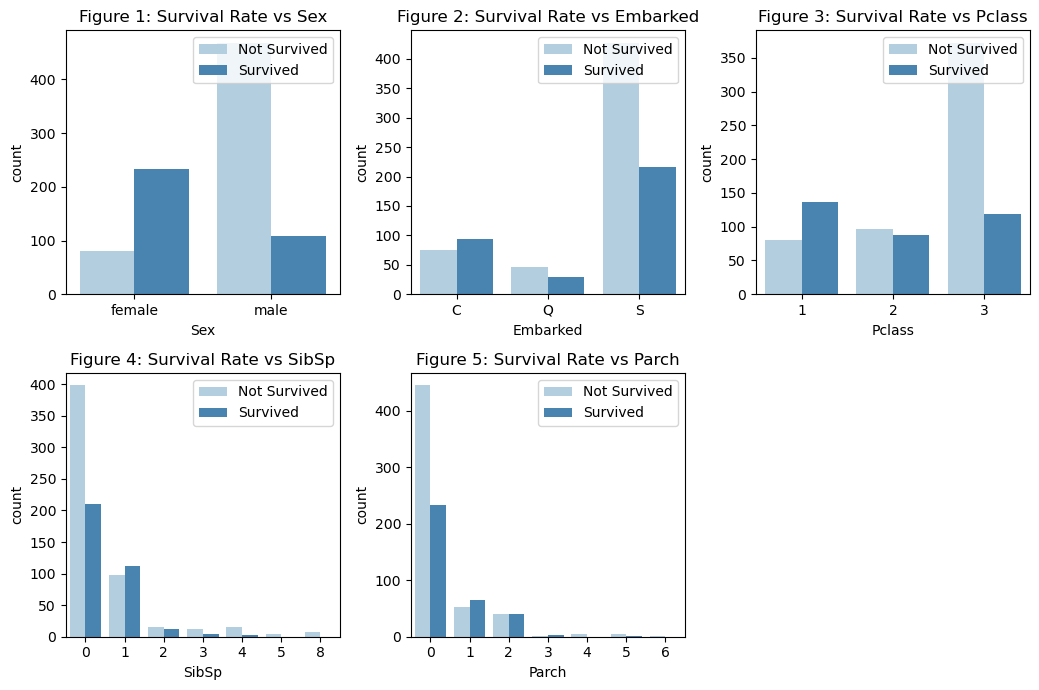

In [19]:
cols = ["Sex","Embarked","Pclass","SibSp","Parch"]
n_rows = 2
n_cols = 3

fig,ax = plt.subplots(n_rows,n_cols,figsize=(n_cols*3.5,n_rows*3.5))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols + c #index to loop through list "cols"
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df,x=cols[i],hue="Survived",palette = "Blues",ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title='',loc = 'upper right',labels=["Not Survived","Survived"])
ax.flat[-1].set_visible(False)
plt.tight_layout()

#### Observation:
- Survival Rate:
  * Fig 1 : Female survival rate > male
  * Fig 2 : Most People embarked on Southampton, and also had the highest people not survived
  * Fig 3: 1st class higher survival rate
  * Fig 4: People going with 0 `SibSp` are mosly not survived the number of passwnger with 1-2 famly members has a better chance of survival
  * Fig 5: People going with 0 `Parch` are moslty not survival

### 3.2 EDA for Numerical Features
- Numerical Features:(condious) `Age`,`Fare`

#### Age

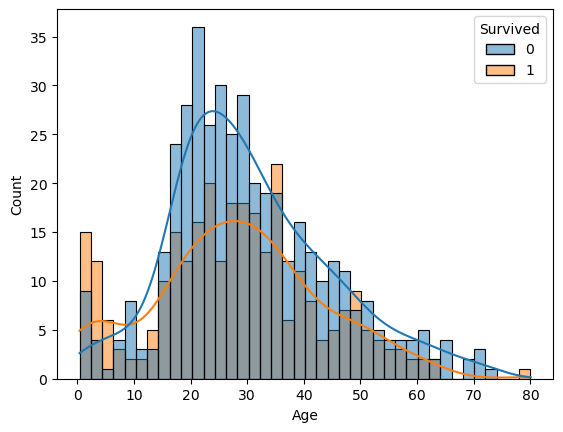

In [20]:
sns.histplot(data = train_df,x="Age",hue = "Survived",bins = 40,kde = True);

- Majority passengers were from 18 - 40 ages
- Children had more chance to survive than other ages
- 

In [21]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

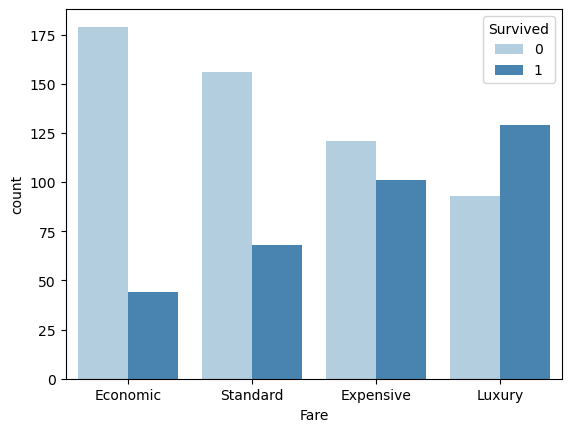

In [22]:
# To name for 0-25% quartile, 25-50,75-100
fare_categories = ["Economic","Standard","Expensive","Luxury"]
quartile_data = pd.qcut(train_df['Fare'],4,labels=fare_categories)
sns.countplot(x = quartile_data,hue=train_df["Survived"],palette="Blues");

In [23]:
train_df["Fare"]

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

- Distribution of Fare
  * Fare does not follow a normal distribution and has a huge spike at the price range `[0 - 100$]`
  * The distribution is skewed to the left with `75%` of the fare paid under `$31` and a max paid fare of `$512`


### 4. Feature Engineering & Data Wraingling

#### Name
- Regex Expression

In [24]:
train_df['Name'].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [25]:
import re # regular expression
def extract_title(name):
    p = re.compile(r",([\w\s+]+)\.")
    return p.search(name).groups(1)[0].strip()
train_df["Title"] = train_df['Name'].apply(lambda name: extract_title(name))

In [26]:
train_df["Title"].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [27]:
test_df["Title"] = test_df["Name"].apply(lambda name:extract_title(name))

In [28]:
def group_title(title):
    if title in ["Mr","Mrs","Miss","Master"]:
        return title
    elif title == 'Ms':
        return "Miss"
    else:
        return "Others"
train_df["Title"] = train_df["Title"].apply(lambda title: group_title(title))
test_df["Title"] = test_df["Title"].apply(lambda title:group_title(title))

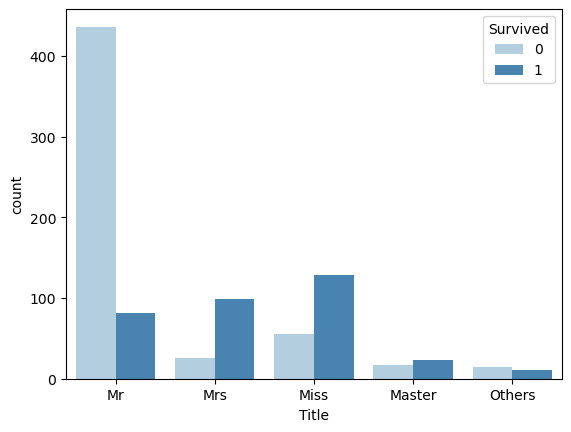

In [29]:
sns.countplot(x = train_df["Title"],hue=train_df["Survived"],palette="Blues");

### Family
- `SibSp`,`Farch`

In [30]:
train_df["Family_size"] = train_df["SibSp"].astype("int") + train_df["Parch"].astype("int")+1

In [31]:
test_df["Family_size"] = test_df["SibSp"].astype("int") + test_df["Parch"].astype("int")+1

In [32]:
train_df["Family_Cat"] = pd.cut(train_df["Family_size"],bins=[0,1,4,6,20],labels=["Solo","Small","Medium","Large"]) # (0,1],(1,4],(4,6],(5,20]

In [33]:
test_df["Family_Cat"] = pd.cut(test_df["Family_size"],bins=[0,1,4,6,20],labels=["Solo","Small","Medium","Large"]) # (0,1],(1,4],(4,6],(5,20]

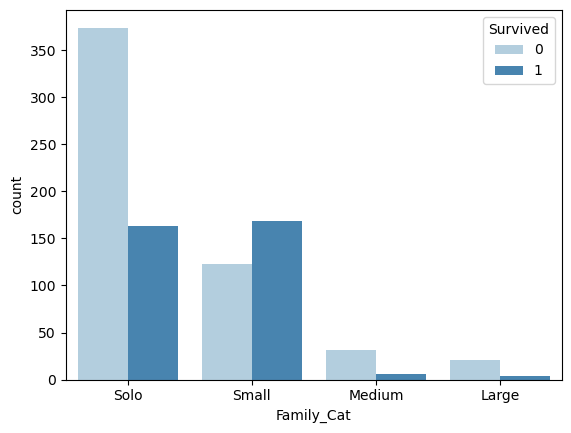

In [34]:
sns.countplot(data = train_df, x = 'Family_Cat',hue="Survived",palette="Blues");

### 4.2 Data Wrangling

In [35]:
num_features = ["Age","Fare"]
cat_features = ["Sex","Pclass","Embarked","Title","Family_Cat"]
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [36]:
def display_missing(df,feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count >0:
            print(f"Col {col} has {missing_count*100/n_rows:.2f}% missing values.")
display_missing(train_df,feature_cols)
display_missing(test_df,feature_cols)

Col Age has 19.87% missing values.
Col Embarked has 0.22% missing values.
Col Age has 20.57% missing values.
Col Fare has 0.24% missing values.


### Filling missing values
##### Age
- Filling missing values with `median` of whole dataset

In [37]:
age_by_sex_pclass = train_df.groupby(["Sex", "Pclass"] ,observed = True )["Age"].median()


In [38]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [39]:
train_df["Age"] = train_df.groupby(["Sex", "Pclass"], observed=True)["Age"].apply(lambda x: x.fillna(x.median())).reset_index(level=["Sex", "Pclass"], drop=True)


In [40]:
test_df["Age"] = test_df.groupby(["Sex", "Pclass"], observed=True)["Age"].apply(lambda x: x.fillna(x.median())).reset_index(level=["Sex", "Pclass"], drop=True)


In [41]:
display_missing(train_df,feature_cols)
display_missing(test_df,feature_cols)

Col Embarked has 0.22% missing values.
Col Fare has 0.24% missing values.


In [42]:
X = train_df[feature_cols]
y = train_df["Survived"]

In [43]:
X_test = test_df[feature_cols]

In [44]:
# preprocess pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy = "median")),
    ("scaler",StandardScaler())
])

cat_transformer = Pipeline(steps = [
    ("imputer",SimpleImputer(strategy = "most_frequent")),
    ("encoder",OneHotEncoder(handle_unknown = "ignore"))
])

In [45]:
preprocessor = ColumnTransformer(transformers=[
    ('num',num_transformer,num_features),
    ('cat',cat_transformer,cat_features)
])

In [46]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [47]:
X = preprocessor.transform(X)

In [48]:
X_test = preprocessor.transform(X_test) 

## 5 Model tranning

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size = 0.2)

In [50]:
x_train.shape,x_val.shape

((712, 19), (179, 19))

In [51]:
X_test.shape

(418, 19)

In [52]:
# binary classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier

In [53]:
log_reg = LogisticRegression(solver='liblinear',max_iter=1000)
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [54]:
log_reg.score(x_val,y_val)

0.8156424581005587

In [55]:
y_pred = log_reg.predict(x_val)

In [56]:
precision_score(y_val,y_pred),recall_score(y_val,y_pred)

(0.7457627118644068, 0.7096774193548387)

In [57]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       117
           1       0.75      0.71      0.73        62

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.82      0.81       179



- y = a*x1 + b*x2+b -> y =a*x1 +b*x2+c x1*x2 bias

In [58]:
poly = PolynomialFeatures(degree =2)

In [59]:
poly_features_x_train = poly.fit_transform(x_train)
poly_features_x_val = poly.transform(x_val)

In [60]:
poly_log_reg = LogisticRegression(solver = "liblinear",max_iter = 1000)
poly_log_reg.fit(poly_features_x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [61]:
poly_log_reg.score(poly_features_x_val,y_val)

0.8268156424581006

In [62]:
# Tạo cây quyết định với các tham số được chỉ định
decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=2022)

# Huấn luyện cây quyết định trên tập huấn luyện
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)

In [63]:
decision_tree.score(x_val,y_val)

0.8044692737430168

## 5.1 Cross-validation

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
log_reg_cv = LogisticRegression(solver = "liblinear",max_iter = 1000)
dt_cv = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=2022)

lr_scores = cross_val_score(log_reg_cv,X,y,scoring='accuracy',cv=5)

In [66]:
lr_scores.mean(),lr_scores.std()

(0.826031008725127, 0.020466357172416235)

In [67]:
dt_scores = cross_val_score(dt_cv,X,y,scoring='accuracy',cv=5)

In [68]:
dt_scores.mean(),dt_scores.std()

(0.8069801016885318, 0.014586754299604428)

## 5.2 Baseline Model Comparision

In [69]:
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from xgboost import XGBClassifier # pip install xgboost
seed = 2022
models = [
    LinearSVC(random_state = seed),
    SVC(random_state = seed),
    KNeighborsClassifier(metric = "minkowski",p=2),
    LogisticRegression(solver = "liblinear",max_iter = 1000),
    DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=seed),
    RandomForestClassifier(random_state = seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(algorithm='SAMME'),
    XGBClassifier(eval_metric = "logloss",random_state=seed)
    
]

In [70]:
from sklearn.model_selection import StratifiedKFold

def generate_baseline_result(models, X, y, metrics="accuracy", cv=5, plot_result=False):
    # Define k-fold
    kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        # Perform cross-validation
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
    
    # Create DataFrame of results
    cv_df = pd.DataFrame(entries, columns=["model_name", "fold_idx", "accuracy_score"])
    if plot_result:
        sns.boxplot(x='model_name',y="accuracy_score",data=cv_df,color="lightblue",showmeans=True)
        plt.title("Boxplot")
        plt.show()
    mean = cv_df.groupby("model_name")["accuracy_score"].mean()
    std = cv_df.groupby("model_name")["accuracy_score"].std()
    baseline_results = pd.concat([mean,std],axis =1,ignore_index = True)
    baseline_results.columns = ["Mean","Stamdard Deviation"]
    baseline_results.sort_values(by=["Mean"],ascending=False,inplace=True)
    return baseline_results


generate_baseline_result(models,X,y,metrics="accuracy",cv=5,plot_result=False)

,Mean,Stamdard Deviation
model_name,,
LinearSVC,0.831636,0.030597
LogisticRegression,0.828278,0.034793
SVC,0.827136,0.030766
XGBClassifier,0.822679,0.013964
KNeighborsClassifier,0.818185,0.016620
AdaBoostClassifier,0.817023,0.040210
DecisionTreeClassifier,0.805838,0.012268
RandomForestClassifier,0.803590,0.016386
ExtraTreesClassifier,0.797979,0.013185


In [71]:
model = models[0]
# training model
model.fit(x_train,y_train)

y_predict = model.predict(x_val)

In [72]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Độ chính xác
accuracy = accuracy_score(y_val, y_predict)
print(f"Accuracy: {accuracy:.2f}")

# Báo cáo chi tiết Precision, Recall, F1-score
print(classification_report(y_val, y_predict))

# Ma trận lỗi
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_predict))


Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       117
           1       0.73      0.65      0.68        62

    accuracy                           0.79       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix:
[[102  15]
 [ 22  40]]


In [73]:
y_test_predict = model.predict(X_test)

In [74]:
y_test_df = test_df.copy()
y_test_df["Survived"] = y_test_predict